## Hypothesis Testing
A statistical hypothesis test is a formal procedure used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population. It helps in making data-driven decisions.

this notebook attempt to answer questions based on the distribution and relationships between different attributes in our dataset using Hypothesis Tests.

 The approach involves the following steps:
 - Define the null hypothesis(H₀) and the alternative hypothesis((H₁)).
 - Select a suitable statistical test along with the corresponding test statistic.
 - Choose a significance level α (commonly set at 0.05).
 - Compute the test statistic's value.
 - Calculate the probability of the test statistic 
 - Compare the resulting probability with the predetermined significance level.

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
# importing modules from scripts 
#from scripts.hypothesis_analysis import *

In [5]:
# load insurance data
df = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

In [6]:
# Calculate risk and margin
#df['Risk'] = df['TotalClaims'] / df['SumInsured']
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

In [7]:
def print_test_results(result, risks):
    if 'error' in result:
        print(result['error'])
    else:
        print(f"Test type: {result['test_type']}")
        print(f"Statistic: {result['statistic']}")
        print(f"p-value: {result['p_value']}")
        print(result['interpretation'])
    print(f"Risks:\n{risks}\n")

### 1. Test for risk differences across provinces

- Null Hypothesis (H₀): There are no risk differences across provinces (interms of TotalPremium)
- Alternative Hypothesis (H₁): There is risk differences across provinces

In [8]:
 # Test for risk differences across provinces using anova test
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(df, 'Province', 'TotalPremium')
result = perform_statistical_test(df, 'Province', 'TotalPremium', 'anova')
print_test_results(result, province_risks)

1. Testing for risk differences across provinces


NameError: name 'calculate_risk' is not defined

In [9]:
 # Test for risk differences across provinces using chi_square test
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(df, 'Province', 'TotalPremium')
result = perform_statistical_test(df, 'Province', 'TotalPremium', 'chi_square')
print_test_results(result, province_risks)

1. Testing for risk differences across provinces


NameError: name 'calculate_risk' is not defined

### Visualizations for risk difference accross province 

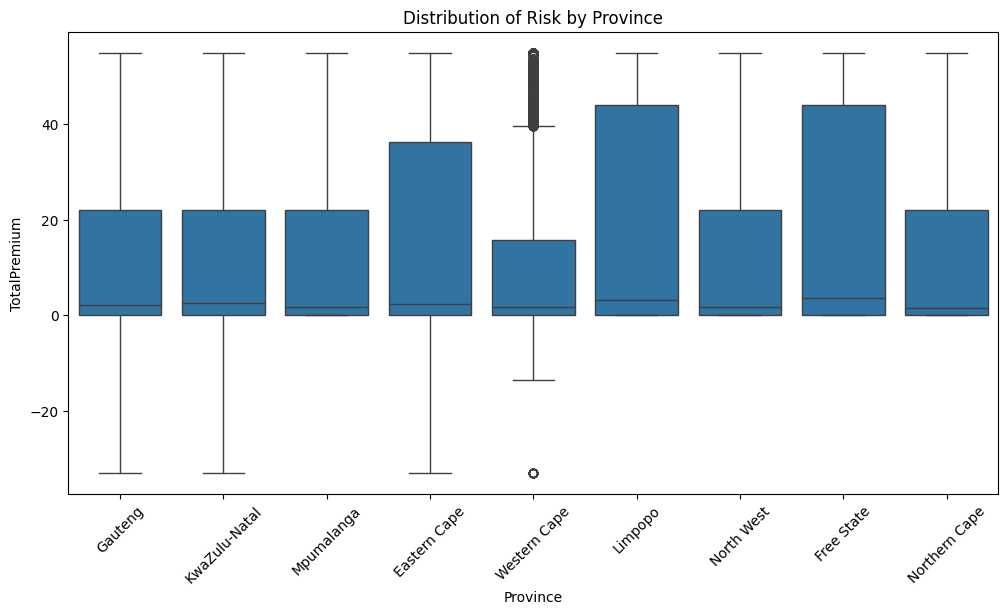

In [10]:
# Visualizations for risk difference across province 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='TotalPremium', data=df)
plt.title('Distribution of Risk by Province')
plt.xticks(rotation=45)
plt.show()

### 2. Test for risk differences between zip codes

- Null Hypothesis (H₀): TThere are no risk differences between zip codes(interms of TotalPremium)
- Alternative Hypothesis (H₁): There is risk differences between zip codes

In [11]:
#  Test for risk differences between zipcodes using anova test 
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(df, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(df, 'PostalCode', 'TotalPremium', 'anova')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes


NameError: name 'calculate_risk' is not defined

In [12]:
#  Test for risk differences between zipcodes using chi_square test 
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(df, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(df, 'PostalCode', 'TotalPremium', 'chi_square')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes


NameError: name 'calculate_risk' is not defined

### 3. Test for margin (profit) differences between zip codes

- Null Hypothesis (H₀): There are no significant margin (profit) difference between zip codes
- Alternative Hypothesis (H₁): There is a significant margin (profit) difference between zip codes

In [13]:
#  Test for margin (profit) differences between zip codes using anova test 
print("3. Testing for margin differences between zip codes")
zipcode_margins = calculate_margin(df, 'PostalCode')
result = perform_statistical_test(df, 'PostalCode', 'Margin', 'anova')
print_test_results(result, zipcode_margins.nlargest(5))

3. Testing for margin differences between zip codes


NameError: name 'calculate_margin' is not defined

In [13]:
#  Test for margin (profit) differences between zip codes using chi_square test 
print("3. Testing for margin differences between zip codes")
zipcode_margins = calculate_margin(df, 'PostalCode')
result = perform_statistical_test(df, 'PostalCode', 'Margin', 'chi_square')
print_test_results(result, zipcode_margins.nlargest(5))

3. Testing for margin differences between zip codes
Test type: chi_square
Statistic: 143288895.37515512
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
PostalCode
2000    2.281240e+06
122     6.682290e+05
299     4.235489e+05
7784    3.321872e+05
2196    2.474567e+05
dtype: float64



### 4. Test for risk differences between Women and Men

- Null Hypothesis (H₀): There is no significant difference in risk between males and females (in terms of TotalPremium).
- Alternative Hypothesis (H₁): There is a significant difference in risk between males and females.

In [14]:
# 4. Test for risk differences between Women and Men
print("4. Testing for risk differences between Women and Men")

filtered_df = df[df['Gender'].isin(['Male', 'Female'])]

gender_risks = calculate_risk(filtered_df, 'Gender', 'TotalPremium')
result = perform_statistical_test(filtered_df, 'Gender', 'TotalPremium', 't_test')
print_test_results(result, gender_risks)


4. Testing for risk differences between Women and Men


NameError: name 'calculate_risk' is not defined

### Visualizations for risk difference between men and women 

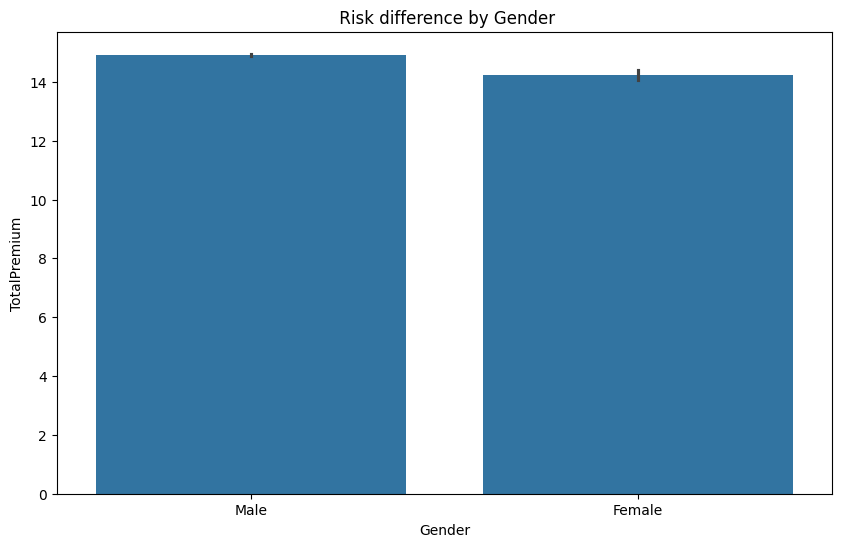

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='TotalPremium', data=filtered_df)
plt.title(' Risk difference by Gender')
plt.show()

observations
- Since the p-value is much smaller than the typical alpha level (0.05), the test results correctly indicate rejecting the null hypothesis.
-  Even though the risk difference appears small visually, statistical significance can still be present due to factors like the sample size or data distribution.

While the p-value suggests that the difference is statistically significant, the actual difference in the means seems minimal

### Additional analysis: Risk vs. Premium correlation

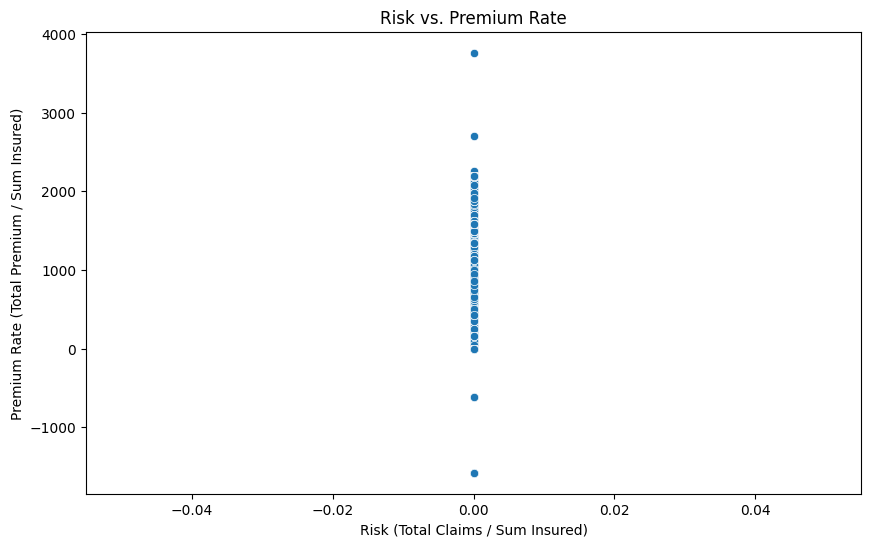

In [16]:
# Additional analysis: Risk vs. Premium correlation
df['Risk'] = df['TotalClaims'] / df['SumInsured']
df['PremiumRate'] = df['TotalPremium'] / df['SumInsured']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Risk', y='PremiumRate', data=df)
plt.title('Risk vs. Premium Rate')
plt.xlabel('Risk (Total Claims / Sum Insured)')
plt.ylabel('Premium Rate (Total Premium / Sum Insured)')
plt.show()

#correlation = df['Risk'].corr(df['PremiumRate'])
#print(f"Correlation between Risk and Premium Rate: {correlation:.4f}")